# CSC477 - Data Mining

## Visualization of k-means algorithm.


Program uses scikit learn blobs to generate 500 points in a 2D space.  Implementation of k-means 
starts by randomly initializing centroids.  The algorithm iterates 20 times, outputting centroid
coordinates and MSE with each iteration (20 iterations is arbitrary but is usually sufficient for
the algorithm to converge given a small k).  The centroids and point assignments are plotted at 
each iteration, and the frames are saved as an mp4 movie.  **Must install** module ``celluloid`` to 
run. 

In [ ]:
!pip install celluloid

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from celluloid import Camera

def euc_dist(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


def assign_cluster(point, centroids):
    min_dist = 1000
    cluster = -1
    
    for i in range(len(centroids)):
        cur_dist = euc_dist(point, centroids[i])
        if  cur_dist < min_dist:
            min_dist = cur_dist
            cluster = i
            
    return cluster


def compute_MSE(points, which_cluster, centroids):
    SE = 0
    for i in range(len(points)):
        cent_idx = which_cluster[i]
        SE = SE + euc_dist(centroids[cent_idx], points[i]) ** 2
    
    return SE / len(points)
    

def adjust_centroids(points, which_cluster, centroids):
    new_centroids = []
    for i in range(len(centroids)):
        x_sum = 0
        y_sum = 0
        n = 0
        for j in range(len(points)):
            if which_cluster[j] == i:
                x_sum = x_sum + points[j][0]
                y_sum = y_sum + points[j][1]
                n = n+1
        if n==0:
            print('centroid has no points assigned to it!! Assigning random centroid.')
            new_centroids.append(random.choice(points))
        else:
            new_centroids.append((x_sum/n, y_sum/n))   
    return new_centroids

## Create and plot random blobs
The dataset generated will be used as input to the k-means algorithm.

How many blobs? 5


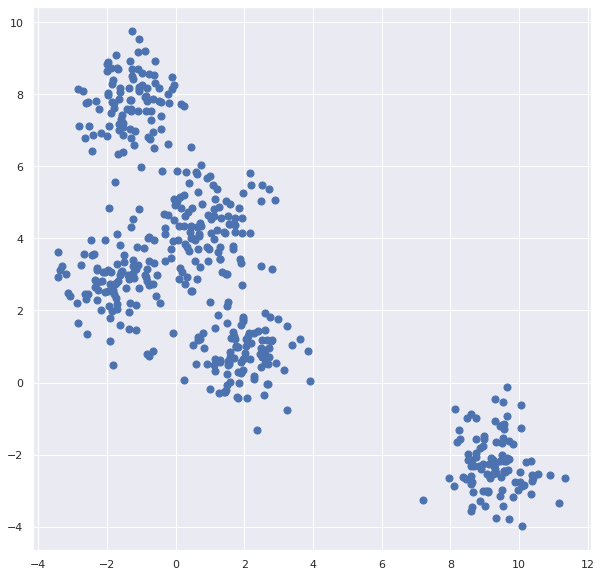

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs

plt.rcParams["figure.figsize"] = (10,10)
sns.set()
num_blobs = int(input('How many blobs? '))
X, _ = make_blobs(n_samples=500, 
                  centers=num_blobs,
                  cluster_std=0.80, 
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], s = 50);

How many clusters? 5
Centroids: (8.67, -2.30)  (0.70, 1.21)  (0.92, 0.50)  (9.56, -2.45)  (1.90, 0.58)  , MSE: 99.818
Centroids: (8.63, -2.13)  (-0.60, 4.83)  (1.07, 0.23)  (9.72, -2.34)  (2.27, 0.76)  , MSE: 4.735
Centroids: (8.65, -2.15)  (-0.70, 5.18)  (0.54, 0.71)  (9.74, -2.33)  (2.26, 1.20)  , MSE: 4.087
Centroids: (8.67, -2.18)  (-0.71, 5.43)  (-0.19, 1.37)  (9.77, -2.32)  (2.19, 1.24)  , MSE: 3.828
Centroids: (8.71, -2.22)  (-0.52, 6.03)  (-1.16, 2.36)  (9.81, -2.29)  (2.05, 1.10)  , MSE: 2.965
Centroids: (8.72, -2.23)  (-0.42, 6.49)  (-1.33, 2.84)  (9.83, -2.28)  (1.92, 1.15)  , MSE: 2.473
Centroids: (8.74, -2.23)  (-0.48, 6.74)  (-1.16, 3.01)  (9.84, -2.28)  (1.92, 1.17)  , MSE: 2.389
Centroids: (8.74, -2.23)  (-0.60, 6.96)  (-0.95, 3.15)  (9.84, -2.28)  (1.94, 1.13)  , MSE: 2.315
Centroids: (8.74, -2.23)  (-0.78, 7.23)  (-0.73, 3.31)  (9.84, -2.28)  (1.95, 1.06)  , MSE: 2.218
Centroids: (8.74, -2.23)  (-1.00, 7.48)  (-0.53, 3.45)  (9.84, -2.28)  (1.96, 0.93)  , MSE: 2.113
Ce

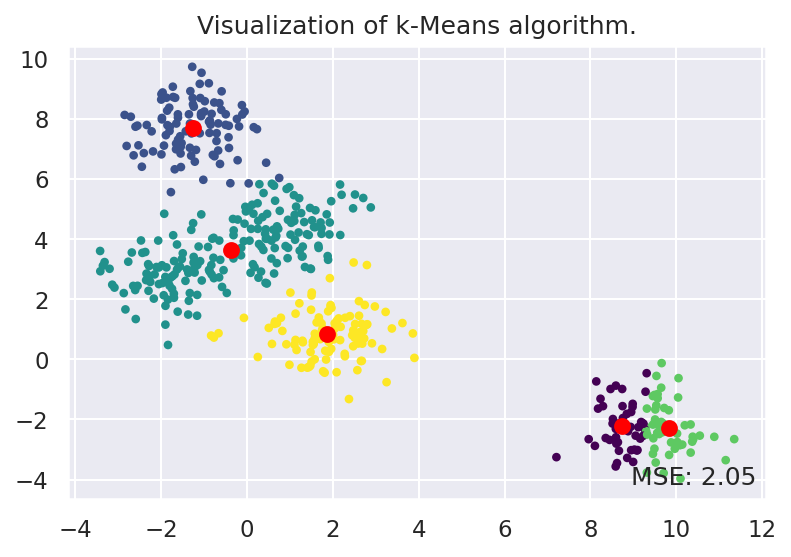

In [ ]:


num_clusters = int(input('How many clusters? '))

# Transform the blobs to a list of (x, y) tuples
x_vals = X[:, 0]
y_vals = X[:, 1]
points = list(zip(x_vals, y_vals))


centroids = []

# which_cluster[i] is the cluster number to which point i is assigned
which_cluster = [0] * len(points)

# Select the indices of random points that will be used as initial centroids
centroid_i = np.random.choice(np.arange(len(points)), num_clusters, replace=False)

# Store the coordinates of the centroids in centroids
for i in centroid_i:
    centroids.append(points[i])

# Set up the camera for later recording of matplotlib plots
fig, ax = plt.subplots(dpi=150)
camera = Camera(fig)

# k-means algorithm loop first assigns points to clusters and then
# adjusts the centroid locations
for j in range(20):
    
    # Get the mean squared error (MSE) for the current cluster assignment
    MSE = compute_MSE(points, which_cluster, centroids)
    
    print('Centroids:', end =' ')
    # output the centroids and MSE
    for centroid in centroids:
        print(
            '({:.2f}, {:.2f}) '.format(centroid[0], centroid[1]), end = ' '
        )
    print(', MSE:', '{:.3f}'.format(MSE))
    
    # Assign a cluster to each point
    for i in range(len(points)):
        which_cluster[i] = assign_cluster(points[i], centroids)
    
    # Recompute the centroid locations
    centroids = adjust_centroids(points, which_cluster, centroids)
    centroids_coord = list(zip(*centroids))
    
    # plot the point assignments and centroids.  Cluster color is 
    # determined by the cluster assignments (c=which_cluster)
    plt.scatter(X[:, 0], X[:, 1], c=which_cluster, cmap='viridis', s=10)
    plt.scatter(centroids_coord[0], centroids_coord[1], c='red', s=50)
    plt.title('Visualization of k-Means algorithm.')
    
    # output the current MSE to the figure
    ax.text(0.75, 0.15, 'MSE: {:.2f}'.format(MSE), transform=fig.transFigure)
    
    # Take a snapshot of current figure
    camera.snap()
    
# save to a movie
anim = camera.animate(blit=True)
anim.save('k-means.mp4')
    


## You can view the k-means.mp4 animation by clicking on the Files icon to the left.  
